In [5]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [1]:
from deepagri.data_full import get_df_full

In [24]:
df=get_df_full(agg_type='M')

In [25]:
df

,Agriculteur,Production,RatioSep,RatioOct,tmax_c 01,tmax_c 02,tmax_c 03,tmax_c 04,tmax_c 05,tmax_c 06,tmax_c 07,tmax_c 08,tmax_c 09,tmax_c 10,tmax_c 11,tmax_c 12,tmin_c 01,tmin_c 02,tmin_c 03,tmin_c 04,tmin_c 05,tmin_c 06,tmin_c 07,tmin_c 08,tmin_c 09,tmin_c 10,tmin_c 11,tmin_c 12,windspeed_max 01,windspeed_max 02,windspeed_max 03,windspeed_max 04,windspeed_max 05,windspeed_max 06,windspeed_max 07,windspeed_max 08,windspeed_max 09,windspeed_max 10,windspeed_max 11,windspeed_max 12,...,dewmax_c 09,dewmax_c 10,dewmax_c 11,dewmax_c 12,snow_mm 01,snow_mm 02,snow_mm 03,snow_mm 04,snow_mm 05,snow_mm 06,snow_mm 07,snow_mm 08,snow_mm 09,snow_mm 10,snow_mm 11,snow_mm 12,uv_idx 01,uv_idx 02,uv_idx 03,uv_idx 04,uv_idx 05,uv_idx 06,uv_idx 07,uv_idx 08,uv_idx 09,uv_idx 10,uv_idx 11,uv_idx 12,sunhour 01,sunhour 02,sunhour 03,sunhour 04,sunhour 05,sunhour 06,sunhour 07,sunhour 08,sunhour 09,sunhour 10,sunhour 11,sunhour 12
2009-1,2893.183241,189200.0,1.151316,1.129496,6.0,4.0,5.0,6.0,4.0,8.0,7.0,5.0,5.0,4.0,6.0,7.0,7.0,5.0,6.0,4.0,6.0,6.0,7.0,5.0,3.0,4.0,7.0,6.0,14.322581,16.250000,18.129032,12.333333,14.741935,15.366667,12.322581,11.354839,12.000000,14.193548,17.700000,17.548387,...,17.0,16.0,13.0,11.0,4.2,23.6,4.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.6,1.774194,1.607143,2.161290,3.400000,4.741935,4.900000,5.322581,5.774194,4.266667,3.419355,2.666667,1.645161,7.454839,7.196429,9.703226,12.376667,13.970968,14.073333,13.835484,13.716129,11.066667,8.932258,6.893333,6.077419
2009-2,3672.043051,1562314.0,1.151316,1.129496,4.0,2.0,6.0,6.0,2.0,6.0,5.0,5.0,4.0,5.0,6.0,6.0,4.0,5.0,3.0,5.0,4.0,6.0,6.0,2.0,6.0,5.0,6.0,5.0,20.612903,18.250000,19.516129,15.433333,15.903226,13.900000,16.516129,12.258065,14.633333,17.000000,27.166667,22.387097,...,16.0,18.0,14.0,11.0,6.8,10.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.9,1.709677,1.785714,2.290323,3.533333,4.129032,4.600000,5.064516,5.516129,4.466667,3.290323,2.700000,1.903226,6.683871,6.814286,9.219355,11.496667,12.648387,13.726667,13.141935,13.693548,10.553333,7.745161,5.053333,5.029032
2009-3,4512.972534,290360.0,1.151316,1.129496,3.0,5.0,9.0,6.0,7.0,7.0,5.0,6.0,4.0,4.0,4.0,8.0,6.0,5.0,4.0,7.0,6.0,5.0,5.0,4.0,7.0,4.0,4.0,5.0,18.193548,19.000000,19.225806,15.000000,13.838710,14.866667,13.258065,11.161290,13.033333,14.580645,18.766667,20.225806,...,19.0,18.0,13.0,11.0,3.1,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.2,1.774194,1.750000,2.419355,3.333333,4.387097,4.933333,5.419355,5.741935,4.600000,3.548387,2.833333,1.774194,7.222581,7.957143,9.787097,11.223333,13.225806,13.683333,13.606452,13.503226,10.506667,9.261290,6.766667,5.348387
2009-4,1435.126715,7322.0,1.151316,1.129496,9.0,3.0,9.0,5.0,5.0,6.0,6.0,7.0,4.0,6.0,8.0,4.0,6.0,5.0,4.0,4.0,5.0,5.0,9.0,4.0,2.0,7.0,5.0,4.0,11.483871,17.000000,16.967742,14.166667,13.258065,14.200000,17.290323,12.580645,11.600000,12.774194,14.433333,15.387097,...,18.0,15.0,12.0,9.0,35.6,3.0,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.5,1.516129,1.750000,2.354839,2.966667,4.838710,5.366667,6.129032,5.806452,4.266667,3.419355,2.766667,1.838710,7.629032,9.335714,10.964516,12.526667,14.258065,14.436667,14.432258,13.903226,11.273333,9.293548,8.183333,7.467742
2009-5,1457.438643,10065.5,1.151316,1.129496,3.0,3.0,5.0,5.0,5.0,5.0,5.0,7.0,8.0,4.0,7.0,6.0,4.0,4.0,7.0,6.0,5.0,2.0,6.0,1.0,4.0,6.0,4.0,5.0,13.387097,20.928571,20.193548,15.166667,16.064516,17.300000,18.483871,14.516129,12.200000,16.709677,16.466667,19.129032,...,18.0,13.0,11.0,7.0,25.4,9.8,15.6,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.7,17.5,1.483871,1.607143,1.806452,2.533333,4.225806,4.566667,5.516129,5.193548,3.633333,2.870968,1.966667,1.483871,6.725806,8.678571,10.683871,12.286667,14.093548,14.343333,14.403226,13.941935,10.996667,9.490323,7.516667,7.409677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [26]:
cols_to_keep=['Agriculteur','Production','RatioSep','RatioOct',"01",'02','10','11','12']
months_to_shift=['10','11','12']

for i in df.columns:
    if i[-2:] in cols_to_keep or i in cols_to_keep:
        if i[-2:] in months_to_shift:
            df[i]=df[i].shift(93)
    else :
        df=df.drop(columns=[i])

In [28]:
df=df.dropna()

In [30]:
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached matplotlib-3.5.1-cp38-cp38-macosx_10_9_x86_64.whl (7.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 2.8 MB/s eta 0:00:0000:0100:01
  Using cached kiwisolver-1.3.2-cp38-cp38-macosx_10_9_x86_64.whl (61 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 895.5/895.5 KB 3.6 MB/s eta 0:00:0000:0100:01


In [33]:
!pip install matplotlib

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

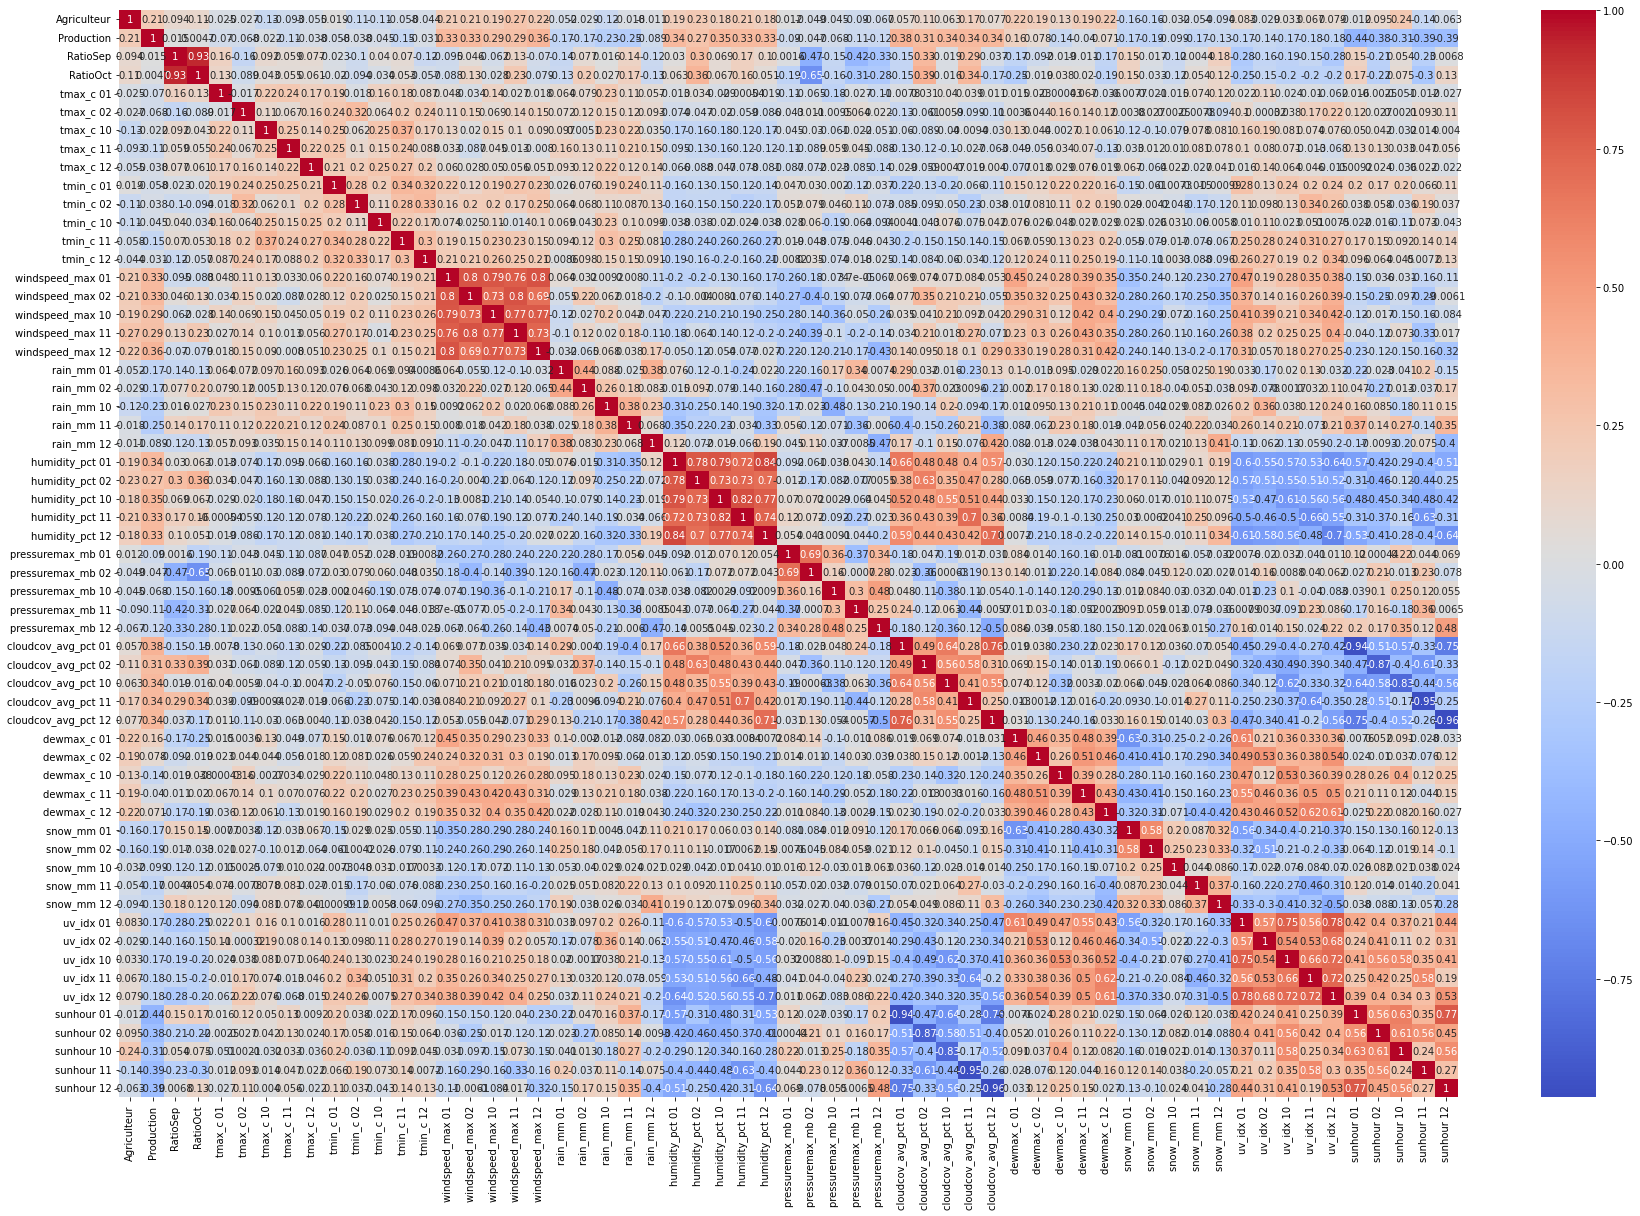

In [37]:
plt.figure(figsize = (30,20))

sns.heatmap(df.corr(), 
            cmap='coolwarm', 
            annot = True, 
            annot_kws={"size": 10})

In [40]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 3.6 MB/s eta 0:00:0000:0100:01


In [41]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config; set_config(display='diagram')
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate

xgb=XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1)

scaler=RobustScaler()
pipe=Pipeline([
         ('Scaler',scaler),
         ('XGBoost',xgb)
])

/Users/constantintalandier/.pyenv/versions/3.8.12/envs/deepagri/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [46]:
X_test=df.iloc[-93:].drop(columns=['Production'])
y_test=df.iloc[-93:]['Production']
X_train=df.iloc[:-93].drop(columns=['Production'])
y_train=df.iloc[:-93]['Production']

In [47]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Scaler', RobustScaler()),
                ('XGBoost',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='', learning_rate=0.1,
                              max_delta_step=0, max_depth=10,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=10, num_parallel_tree=1, predictor='auto',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [50]:
y_pred=pipe.predict(X_test)

In [49]:
from sklearn.metrics import mean_absolute_error

In [51]:
mean_absolute_error(y_test,y_pred)

210008.9320179929

In [52]:
y_pred.sum()

41646436.0

In [53]:
y_test.sum()

35409386.8

In [56]:
X=df.drop(columns=['Production'])
y=df['Production']
import pandas as pd
from sklearn.inspection import permutation_importance
pipe.fit(X,y)
permutation_score = permutation_importance(pipe, X, y, n_repeats=10)
importance_df = pd.DataFrame(np.vstack((X.columns,permutation_score.importances_mean)).T) # Unstack results from permutation_score

importance_df.columns=['feature','score decrease']
importance_df.sort_values(by="score decrease", ascending = False) # Order by importance

,feature,score decrease
0,Agriculteur,0.217387
53,sunhour 01,0.175289
17,windspeed_max 12,0.168013
13,windspeed_max 01,0.110664
55,sunhour 10,0.100628
18,rain_mm 01,0.067856
24,humidity_pct 02,0.050391
33,cloudcov_avg_pct 01,0.039393
15,windspeed_max 10,0.030305
52,uv_idx 12,0.024972


In [57]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 1.7 MB/s eta 0:00:0000:0100:01
  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)


In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
df_corr=df.corr()
df_ = pd.DataFrame()

df_["features"] = df_corr.index

for i in range(df_corr.shape[0]):
    df_.loc[i,"vif_index"] = vif(data_no_na_price[df_corr.index].values, i)

round(df_.sort_values(by="vif_index", ascending = False),2)

NameError: name 'data_no_na_price' is not defined

In [68]:
annees=[]
annee=[]
for index,i in enumerate(df.index):
    print(i[-2:],end=' ')
    annee.append(i[-2:])
    if (index+1)%93==0:
        annees.append(annee)
        annee=[]
        print('')

-1 -2 -3 -4 -5 -6 -7 -8 -9 10 11 12 13 14 15 16 17 18 19 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 93 94 95 20 
-1 -2 -3 -4 -5 -6 -7 -8 -9 10 11 12 13 14 15 16 17 18 19 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 93 94 95 20 
-1 -2 -3 -4 -5 -6 -7 -8 -9 10 11 12 13 14 15 16 17 18 19 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 93 94 95 20 
-1 -2 -3 -4 -5 -6 -7 -8 -9 10 11 12 13 14 15 16 17 18 19 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 5

In [71]:
for index,i in enumerate(annees):
    print(annees[index-1]==i)

True
True
True
True
True
True
True
True
True
True
True
True
